In [1]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
df = pd.read_csv('./income_pre/train.csv')
df.head(50)

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
5,6,66,Self-emp-not-inc,274451,9th,5,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,25,United-States,1
6,7,56,Private,152874,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,1741,40,United-States,0
7,8,70,Self-emp-not-inc,165586,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,0
8,9,21,Private,211013,Assoc-voc,11,Married-civ-spouse,Other-service,Other-relative,White,Female,0,0,50,Mexico,0
9,10,33,Private,192644,HS-grad,9,Separated,Handlers-cleaners,Unmarried,White,Male,0,0,35,Puerto-Rico,0


In [2]:
df.columns = ['no','age','workclass','fnlwgt','education','educationNum','maritalStatus','occupation','relationship','race','sex','capitalGain','capitalLoss','hoursPerWeek','nativeCountry','income']
df


,no,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


In [3]:
df.keys()

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'educationNum',
       'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
       'income'],
      dtype='object')

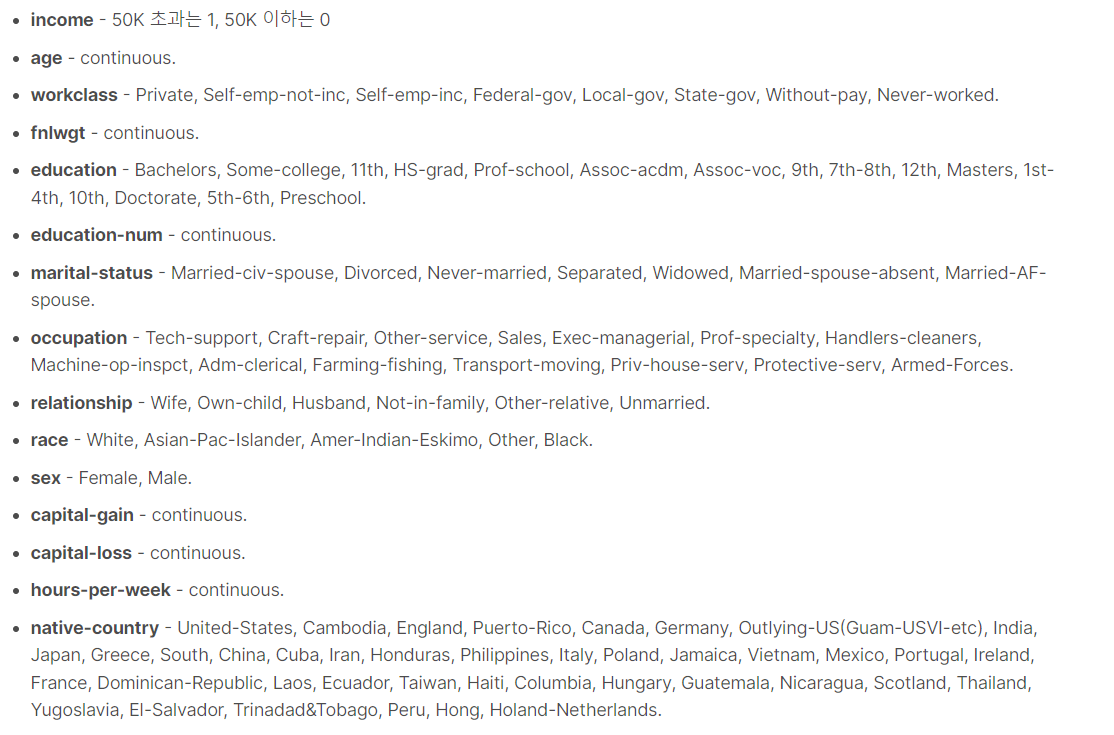


In [4]:
df.info() # 데이터의 기본정보 확인 결측치 안보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   no             29305 non-null  int64 
 1   age            29305 non-null  int64 
 2   workclass      29305 non-null  object
 3   fnlwgt         29305 non-null  int64 
 4   education      29305 non-null  object
 5   educationNum   29305 non-null  int64 
 6   maritalStatus  29305 non-null  object
 7   occupation     29305 non-null  object
 8   relationship   29305 non-null  object
 9   race           29305 non-null  object
 10  sex            29305 non-null  object
 11  capitalGain    29305 non-null  int64 
 12  capitalLoss    29305 non-null  int64 
 13  hoursPerWeek   29305 non-null  int64 
 14  nativeCountry  29305 non-null  object
 15  income         29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


레이블인코딩

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df.education)
df.education = encoder.transform(df.education)
df.education

0         1
1        15
2         9
3         8
4        15
         ..
29300    11
29301    11
29302     0
29303     1
29304    11
Name: education, Length: 29305, dtype: int32

In [6]:
df.occupation

0         Machine-op-inspct
1             Other-service
2         Handlers-cleaners
3              Tech-support
4          Transport-moving
                ...        
29300                 Sales
29301                 Sales
29302       Farming-fishing
29303          Craft-repair
29304                     ?
Name: occupation, Length: 29305, dtype: object

In [7]:
encoder.fit(df.occupation)
df.occupation = encoder.transform(df.occupation)
df.occupation

0         7
1         8
2         6
3        13
4        14
         ..
29300    12
29301    12
29302     5
29303     3
29304     0
Name: occupation, Length: 29305, dtype: int32

In [8]:
encoder.fit(df.iloc[:,-2])
df.iloc[:,-2] = encoder.transform(df.iloc[:,-2])
df.iloc[:,-2]

0        39
1        39
2        14
3        39
4        39
         ..
29300    33
29301    39
29302    39
29303    39
29304    39
Name: nativeCountry, Length: 29305, dtype: int32

In [9]:
df.iloc[:,-3]

0        40
1        55
2        50
3        40
4        70
         ..
29300    40
29301    40
29302    40
29303    65
29304    40
Name: hoursPerWeek, Length: 29305, dtype: int64

In [10]:
df.iloc[:,-3] #hours-per-week

0        40
1        55
2        50
3        40
4        70
         ..
29300    40
29301    40
29302    40
29303    65
29304    40
Name: hoursPerWeek, Length: 29305, dtype: int64

In [11]:
df

,no,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,1,25,Private,219199,1,7,Divorced,7,Not-in-family,White,Male,0,0,40,39,0
1,2,39,Private,52978,15,10,Divorced,8,Not-in-family,White,Female,0,1721,55,39,0
2,3,35,Private,196899,9,13,Never-married,6,Not-in-family,Asian-Pac-Islander,Female,0,0,50,14,0
3,4,64,Private,135527,8,11,Divorced,13,Not-in-family,White,Female,0,0,40,39,0
4,5,24,Private,60783,15,10,Married-civ-spouse,14,Husband,White,Male,0,0,70,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,11,9,Never-married,12,Own-child,Other,Male,0,0,40,33,0
29301,29302,21,Private,372636,11,9,Never-married,12,Own-child,Black,Male,0,0,40,39,0
29302,29303,18,Self-emp-not-inc,258474,0,6,Never-married,5,Own-child,White,Male,0,0,40,39,0
29303,29304,33,Private,157446,1,7,Never-married,3,Not-in-family,White,Male,0,0,65,39,0


In [12]:
df.iloc[:,-3]

0        40
1        55
2        50
3        40
4        70
         ..
29300    40
29301    40
29302    40
29303    65
29304    40
Name: hoursPerWeek, Length: 29305, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df[['hoursPerWeek']])
# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환

df[['hoursPerWeek']] = stscaled

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df[['capitalLoss']])
# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환

df[['capitalLoss']] = stscaled

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df[['capitalGain']])
# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환

df[['capitalGain']] = stscaled

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df[['educationNum']])
# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환

df[['educationNum']] = stscaled

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df[['education']])
# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환

df[['education']] = stscaled

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df[['fnlwgt']])
# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환

df[['fnlwgt']] = stscaled

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df[['age']])
# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환

df[['age']] = stscaled

In [20]:
df

,no,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,1,-0.993857,Private,0.278922,-2.403207,-1.199481,Divorced,7,Not-in-family,White,Male,-0.144689,-0.217023,-0.035685,39,0
1,2,0.024799,Private,-1.294649,1.216190,-0.032314,Divorced,8,Not-in-family,White,Female,-0.144689,4.072408,1.180600,39,0
2,3,-0.266246,Private,0.067813,-0.334980,1.134853,Never-married,6,Not-in-family,Asian-Pac-Islander,Female,-0.144689,-0.217023,0.775172,14,0
3,4,1.843829,Private,-0.513179,-0.593508,0.356742,Divorced,13,Not-in-family,White,Female,-0.144689,-0.217023,-0.035685,39,0
4,5,-1.066619,Private,-1.220761,1.216190,-0.032314,Married-civ-spouse,14,Husband,White,Male,-0.144689,-0.217023,2.396886,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,-1.357663,Private,-0.843777,0.182077,-0.421370,Never-married,12,Own-child,Other,Male,-0.144689,-0.217023,-0.035685,33,0
29301,29302,-1.284902,Private,1.731470,0.182077,-0.421370,Never-married,12,Own-child,Black,Male,-0.144689,-0.217023,-0.035685,39,0
29302,29303,-1.503186,Self-emp-not-inc,0.650728,-2.661735,-1.588536,Never-married,5,Own-child,White,Male,-0.144689,-0.217023,-0.035685,39,0
29303,29304,-0.411768,Private,-0.305678,-2.403207,-1.199481,Never-married,3,Not-in-family,White,Male,-0.144689,-0.217023,1.991457,39,0


In [21]:
df.drop(['no'], axis=1, inplace = True)

In [22]:
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,-0.993857,Private,0.278922,-2.403207,-1.199481,Divorced,7,Not-in-family,White,Male,-0.144689,-0.217023,-0.035685,39,0
1,0.024799,Private,-1.294649,1.216190,-0.032314,Divorced,8,Not-in-family,White,Female,-0.144689,4.072408,1.180600,39,0
2,-0.266246,Private,0.067813,-0.334980,1.134853,Never-married,6,Not-in-family,Asian-Pac-Islander,Female,-0.144689,-0.217023,0.775172,14,0
3,1.843829,Private,-0.513179,-0.593508,0.356742,Divorced,13,Not-in-family,White,Female,-0.144689,-0.217023,-0.035685,39,0
4,-1.066619,Private,-1.220761,1.216190,-0.032314,Married-civ-spouse,14,Husband,White,Male,-0.144689,-0.217023,2.396886,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,-1.357663,Private,-0.843777,0.182077,-0.421370,Never-married,12,Own-child,Other,Male,-0.144689,-0.217023,-0.035685,33,0
29301,-1.284902,Private,1.731470,0.182077,-0.421370,Never-married,12,Own-child,Black,Male,-0.144689,-0.217023,-0.035685,39,0
29302,-1.503186,Self-emp-not-inc,0.650728,-2.661735,-1.588536,Never-married,5,Own-child,White,Male,-0.144689,-0.217023,-0.035685,39,0
29303,-0.411768,Private,-0.305678,-2.403207,-1.199481,Never-married,3,Not-in-family,White,Male,-0.144689,-0.217023,1.991457,39,0


In [23]:
sexdum = pd.get_dummies(df['sex'])
sexdum

,Female,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
29300,0,1
29301,0,1
29302,0,1
29303,0,1


In [24]:
racedum = pd.get_dummies(df['race'])
racedum

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
29300,0,0,0,1,0
29301,0,0,1,0,0
29302,0,0,0,0,1
29303,0,0,0,0,1


In [25]:
relationship = pd.get_dummies(df['relationship'])
relationship

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
29300,0,0,0,1,0,0
29301,0,0,0,1,0,0
29302,0,0,0,1,0,0
29303,0,1,0,0,0,0


In [26]:
maritalStatusdum = pd.get_dummies(df['maritalStatus'])
maritalStatusdum

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
29300,0,0,0,0,1,0,0
29301,0,0,0,0,1,0,0
29302,0,0,0,0,1,0,0
29303,0,0,0,0,1,0,0


In [27]:
import numpy as np 
workclassdum = pd.get_dummies(df['workclass'])
workclassdum

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
29300,0,0,0,0,1,0,0,0,0
29301,0,0,0,0,1,0,0,0,0
29302,0,0,0,0,0,0,1,0,0
29303,0,0,0,0,1,0,0,0,0


In [28]:
df.corr()

,age,fnlwgt,education,educationNum,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
age,1.000000,-0.075753,-0.010707,0.035084,-0.017938,0.078498,0.054413,0.073100,-0.003506,0.238460
fnlwgt,-0.075753,1.000000,-0.022574,-0.030600,-0.004528,-0.005051,-0.001513,-0.010154,-0.053128,-0.002994
education,-0.010707,-0.022574,1.000000,0.358224,-0.019543,0.028027,0.021188,0.055359,0.065693,0.081312
educationNum,0.035084,-0.030600,0.358224,1.000000,0.110267,0.127651,0.083925,0.147569,0.057464,0.331798
occupation,-0.017938,-0.004528,-0.019543,0.110267,1.000000,0.026461,0.013131,0.075433,-0.012962,0.078490
capitalGain,0.078498,-0.005051,0.028027,0.127651,0.026461,1.000000,-0.031401,0.088609,0.006409,0.221387
capitalLoss,0.054413,-0.001513,0.021188,0.083925,0.013131,-0.031401,1.000000,0.055271,0.003584,0.135645
hoursPerWeek,0.073100,-0.010154,0.055359,0.147569,0.075433,0.088609,0.055271,1.000000,-0.001269,0.231045
nativeCountry,-0.003506,-0.053128,0.065693,0.057464,-0.012962,0.006409,0.003584,-0.001269,1.000000,0.017058
income,0.238460,-0.002994,0.081312,0.331798,0.078490,0.221387,0.135645,0.231045,0.017058,1.000000


In [29]:
dfX

NameError: name 'dfX' is not defined

In [30]:
dfX = df.drop(['workclass','maritalStatus','relationship','race','sex'], axis=1)
dfX

,age,fnlwgt,education,educationNum,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,-0.993857,0.278922,-2.403207,-1.199481,7,-0.144689,-0.217023,-0.035685,39,0
1,0.024799,-1.294649,1.216190,-0.032314,8,-0.144689,4.072408,1.180600,39,0
2,-0.266246,0.067813,-0.334980,1.134853,6,-0.144689,-0.217023,0.775172,14,0
3,1.843829,-0.513179,-0.593508,0.356742,13,-0.144689,-0.217023,-0.035685,39,0
4,-1.066619,-1.220761,1.216190,-0.032314,14,-0.144689,-0.217023,2.396886,39,1
...,...,...,...,...,...,...,...,...,...,...
29300,-1.357663,-0.843777,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,33,0
29301,-1.284902,1.731470,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,39,0
29302,-1.503186,0.650728,-2.661735,-1.588536,5,-0.144689,-0.217023,-0.035685,39,0
29303,-0.411768,-0.305678,-2.403207,-1.199481,3,-0.144689,-0.217023,1.991457,39,0


컬럼 합치기

In [31]:
dfXX = pd.concat([dfX, workclassdum, maritalStatusdum, relationship, racedum, sexdum], axis=1)
dfXX

,age,fnlwgt,education,educationNum,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,-0.993857,0.278922,-2.403207,-1.199481,7,-0.144689,-0.217023,-0.035685,39,0,...,0,0,0,0,0,0,0,1,0,1
1,0.024799,-1.294649,1.216190,-0.032314,8,-0.144689,4.072408,1.180600,39,0,...,0,0,0,0,0,0,0,1,1,0
2,-0.266246,0.067813,-0.334980,1.134853,6,-0.144689,-0.217023,0.775172,14,0,...,0,0,0,0,1,0,0,0,1,0
3,1.843829,-0.513179,-0.593508,0.356742,13,-0.144689,-0.217023,-0.035685,39,0,...,0,0,0,0,0,0,0,1,1,0
4,-1.066619,-1.220761,1.216190,-0.032314,14,-0.144689,-0.217023,2.396886,39,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,-1.357663,-0.843777,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,33,0,...,1,0,0,0,0,0,1,0,0,1
29301,-1.284902,1.731470,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,39,0,...,1,0,0,0,0,1,0,0,0,1
29302,-1.503186,0.650728,-2.661735,-1.588536,5,-0.144689,-0.217023,-0.035685,39,0,...,1,0,0,0,0,0,0,1,0,1
29303,-0.411768,-0.305678,-2.403207,-1.199481,3,-0.144689,-0.217023,1.991457,39,0,...,0,0,0,0,0,0,0,1,0,1


In [32]:
dfXX

,age,fnlwgt,education,educationNum,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,-0.993857,0.278922,-2.403207,-1.199481,7,-0.144689,-0.217023,-0.035685,39,0,...,0,0,0,0,0,0,0,1,0,1
1,0.024799,-1.294649,1.216190,-0.032314,8,-0.144689,4.072408,1.180600,39,0,...,0,0,0,0,0,0,0,1,1,0
2,-0.266246,0.067813,-0.334980,1.134853,6,-0.144689,-0.217023,0.775172,14,0,...,0,0,0,0,1,0,0,0,1,0
3,1.843829,-0.513179,-0.593508,0.356742,13,-0.144689,-0.217023,-0.035685,39,0,...,0,0,0,0,0,0,0,1,1,0
4,-1.066619,-1.220761,1.216190,-0.032314,14,-0.144689,-0.217023,2.396886,39,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,-1.357663,-0.843777,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,33,0,...,1,0,0,0,0,0,1,0,0,1
29301,-1.284902,1.731470,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,39,0,...,1,0,0,0,0,1,0,0,0,1
29302,-1.503186,0.650728,-2.661735,-1.588536,5,-0.144689,-0.217023,-0.035685,39,0,...,1,0,0,0,0,0,0,1,0,1
29303,-0.411768,-0.305678,-2.403207,-1.199481,3,-0.144689,-0.217023,1.991457,39,0,...,0,0,0,0,0,0,0,1,0,1


In [33]:
dfXx = dfXX.drop(['income'], axis=1)
dfXx

,age,fnlwgt,education,educationNum,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,?,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,-0.993857,0.278922,-2.403207,-1.199481,7,-0.144689,-0.217023,-0.035685,39,0,...,0,0,0,0,0,0,0,1,0,1
1,0.024799,-1.294649,1.216190,-0.032314,8,-0.144689,4.072408,1.180600,39,0,...,0,0,0,0,0,0,0,1,1,0
2,-0.266246,0.067813,-0.334980,1.134853,6,-0.144689,-0.217023,0.775172,14,0,...,0,0,0,0,1,0,0,0,1,0
3,1.843829,-0.513179,-0.593508,0.356742,13,-0.144689,-0.217023,-0.035685,39,0,...,0,0,0,0,0,0,0,1,1,0
4,-1.066619,-1.220761,1.216190,-0.032314,14,-0.144689,-0.217023,2.396886,39,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,-1.357663,-0.843777,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,33,0,...,1,0,0,0,0,0,1,0,0,1
29301,-1.284902,1.731470,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,39,0,...,1,0,0,0,0,1,0,0,0,1
29302,-1.503186,0.650728,-2.661735,-1.588536,5,-0.144689,-0.217023,-0.035685,39,0,...,1,0,0,0,0,0,0,1,0,1
29303,-0.411768,-0.305678,-2.403207,-1.199481,3,-0.144689,-0.217023,1.991457,39,0,...,0,0,0,0,0,0,0,1,0,1


In [35]:
dfy = df['income']
dfy.count()

29305

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dfXX, dfy, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression 

log_clf = LogisticRegression()
log_clf.fit(X_train,Y_train)
log_clf.score(X_test, Y_test)

In [ ]:
X_train

# test 데이터


In [36]:
df_test = pd.read_csv('./income_pre/test.csv')
df_test

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29306,18,?,245274,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States
1,29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
2,29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
3,29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
4,29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,48838,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States
19533,48839,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States
19534,48840,63,Private,117473,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,United-States
19535,48841,18,Private,150817,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States


테스트데이터 전처리

In [37]:
df_test.columns = ['no','age','workclass','fnlwgt','education','educationNum','maritalStatus','occupation','relationship','race','sex','capitalGain','capitalLoss','hoursPerWeek','nativeCountry']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df_test.education)
df_test.education = encoder.transform(df_test.education)
encoder.fit(df_test.occupation)
df_test.occupation = encoder.transform(df_test.occupation)
encoder.fit(df_test.nativeCountry)
df_test.nativeCountry = encoder.transform(df_test.nativeCountry)
encoder.fit(df_test.iloc[:,-2])
df_test.iloc[:,-2] = encoder.transform(df_test.iloc[:,-2])


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df_test[['hoursPerWeek']])
stscaled = sc.fit_transform(df_test[['capitalLoss']])


df_test[['hoursPerWeek']] = stscaled
df_test[['capitalLoss']] = stscaled






In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환



In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df_test[['capitalGain']])
# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환

df_test[['capitalGain']] = stscaled

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df_test[['educationNum']])
# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환

df_test[['educationNum']] = stscaled

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df_test[['education']])
# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환

df_test[['education']] = stscaled

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df_test[['fnlwgt']])
# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환

df_test[['fnlwgt']] = stscaled

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
stscaled = sc.fit_transform(df_test[['age']])
# >> 변환시키고 나선 데이터프레임이 넘파이배열로 변환

df_test[['age']] = stscaled

In [45]:
df_test.drop(['no'], axis=1, inplace = True)


In [ ]:
ssss

In [46]:
df_test

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry
0,-1.509493,?,0.527836,1.215888,-0.027465,Never-married,0,Own-child,White,Male,-0.144987,-0.217290,-0.217290,38
1,-0.704243,Private,-1.009436,0.186026,-0.416289,Married-civ-spouse,8,Wife,White,Female,-0.144987,-0.217290,-0.217290,38
2,0.467030,Private,-1.462903,-0.328905,1.139007,Married-civ-spouse,13,Husband,Black,Male,-0.144987,-0.217290,-0.217290,38
3,0.247416,Self-emp-not-inc,-1.183483,-0.328905,1.139007,Married-civ-spouse,4,Husband,White,Male,-0.144987,-0.217290,-0.217290,38
4,0.174212,Private,0.059343,-0.071440,2.305480,Married-civ-spouse,4,Wife,White,Female,-0.144987,4.471395,4.471395,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,0.467030,Self-emp-not-inc,-0.689365,0.186026,-0.416289,Married-civ-spouse,3,Husband,White,Male,-0.144987,-0.217290,-0.217290,38
19533,0.686644,Private,-0.042421,0.186026,-0.416289,Never-married,4,Not-in-family,White,Female,-0.144987,-0.217290,-0.217290,38
19534,1.784712,Private,-0.682885,1.215888,-0.027465,Married-civ-spouse,10,Husband,White,Male,0.448840,-0.217290,-0.217290,38
19535,-1.509493,Private,-0.367001,-2.388630,-1.193937,Never-married,12,Own-child,White,Female,-0.144987,-0.217290,-0.217290,38


In [47]:
import numpy as np 
sexdums = pd.get_dummies(df_test['sex'])
racedums = pd.get_dummies(df_test['race'])
relationships = pd.get_dummies(df_test['relationship'])
maritalStatusdums = pd.get_dummies(df_test['maritalStatus'])
workclassdums = pd.get_dummies(df_test['workclass'])


In [48]:
last_x = df_test.drop(['workclass','maritalStatus','relationship','race','sex'], axis=1)
last_x

,age,fnlwgt,education,educationNum,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry
0,-1.509493,0.527836,1.215888,-0.027465,0,-0.144987,-0.217290,-0.217290,38
1,-0.704243,-1.009436,0.186026,-0.416289,8,-0.144987,-0.217290,-0.217290,38
2,0.467030,-1.462903,-0.328905,1.139007,13,-0.144987,-0.217290,-0.217290,38
3,0.247416,-1.183483,-0.328905,1.139007,4,-0.144987,-0.217290,-0.217290,38
4,0.174212,0.059343,-0.071440,2.305480,4,-0.144987,4.471395,4.471395,38
...,...,...,...,...,...,...,...,...,...
19532,0.467030,-0.689365,0.186026,-0.416289,3,-0.144987,-0.217290,-0.217290,38
19533,0.686644,-0.042421,0.186026,-0.416289,4,-0.144987,-0.217290,-0.217290,38
19534,1.784712,-0.682885,1.215888,-0.027465,10,0.448840,-0.217290,-0.217290,38
19535,-1.509493,-0.367001,-2.388630,-1.193937,12,-0.144987,-0.217290,-0.217290,38


In [49]:
last_x = pd.concat([last_x, workclassdums, maritalStatusdums, relationships, racedums, sexdums], axis=1)
last_x

,age,fnlwgt,education,educationNum,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,?,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,-1.509493,0.527836,1.215888,-0.027465,0,-0.144987,-0.217290,-0.217290,38,1,...,1,0,0,0,0,0,0,1,0,1
1,-0.704243,-1.009436,0.186026,-0.416289,8,-0.144987,-0.217290,-0.217290,38,0,...,0,0,1,0,0,0,0,1,1,0
2,0.467030,-1.462903,-0.328905,1.139007,13,-0.144987,-0.217290,-0.217290,38,0,...,0,0,0,0,0,1,0,0,0,1
3,0.247416,-1.183483,-0.328905,1.139007,4,-0.144987,-0.217290,-0.217290,38,0,...,0,0,0,0,0,0,0,1,0,1
4,0.174212,0.059343,-0.071440,2.305480,4,-0.144987,4.471395,4.471395,38,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,0.467030,-0.689365,0.186026,-0.416289,3,-0.144987,-0.217290,-0.217290,38,0,...,0,0,0,0,0,0,0,1,0,1
19533,0.686644,-0.042421,0.186026,-0.416289,4,-0.144987,-0.217290,-0.217290,38,0,...,0,0,0,0,0,0,0,1,1,0
19534,1.784712,-0.682885,1.215888,-0.027465,10,0.448840,-0.217290,-0.217290,38,0,...,0,0,0,0,0,0,0,1,0,1
19535,-1.509493,-0.367001,-2.388630,-1.193937,12,-0.144987,-0.217290,-0.217290,38,0,...,1,0,0,0,0,0,0,1,1,0


In [50]:
last_x

,age,fnlwgt,education,educationNum,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,?,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,-1.509493,0.527836,1.215888,-0.027465,0,-0.144987,-0.217290,-0.217290,38,1,...,1,0,0,0,0,0,0,1,0,1
1,-0.704243,-1.009436,0.186026,-0.416289,8,-0.144987,-0.217290,-0.217290,38,0,...,0,0,1,0,0,0,0,1,1,0
2,0.467030,-1.462903,-0.328905,1.139007,13,-0.144987,-0.217290,-0.217290,38,0,...,0,0,0,0,0,1,0,0,0,1
3,0.247416,-1.183483,-0.328905,1.139007,4,-0.144987,-0.217290,-0.217290,38,0,...,0,0,0,0,0,0,0,1,0,1
4,0.174212,0.059343,-0.071440,2.305480,4,-0.144987,4.471395,4.471395,38,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,0.467030,-0.689365,0.186026,-0.416289,3,-0.144987,-0.217290,-0.217290,38,0,...,0,0,0,0,0,0,0,1,0,1
19533,0.686644,-0.042421,0.186026,-0.416289,4,-0.144987,-0.217290,-0.217290,38,0,...,0,0,0,0,0,0,0,1,1,0
19534,1.784712,-0.682885,1.215888,-0.027465,10,0.448840,-0.217290,-0.217290,38,0,...,0,0,0,0,0,0,0,1,0,1
19535,-1.509493,-0.367001,-2.388630,-1.193937,12,-0.144987,-0.217290,-0.217290,38,0,...,1,0,0,0,0,0,0,1,1,0


In [51]:
dfXX

,age,fnlwgt,education,educationNum,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,-0.993857,0.278922,-2.403207,-1.199481,7,-0.144689,-0.217023,-0.035685,39,0,...,0,0,0,0,0,0,0,1,0,1
1,0.024799,-1.294649,1.216190,-0.032314,8,-0.144689,4.072408,1.180600,39,0,...,0,0,0,0,0,0,0,1,1,0
2,-0.266246,0.067813,-0.334980,1.134853,6,-0.144689,-0.217023,0.775172,14,0,...,0,0,0,0,1,0,0,0,1,0
3,1.843829,-0.513179,-0.593508,0.356742,13,-0.144689,-0.217023,-0.035685,39,0,...,0,0,0,0,0,0,0,1,1,0
4,-1.066619,-1.220761,1.216190,-0.032314,14,-0.144689,-0.217023,2.396886,39,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,-1.357663,-0.843777,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,33,0,...,1,0,0,0,0,0,1,0,0,1
29301,-1.284902,1.731470,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,39,0,...,1,0,0,0,0,1,0,0,0,1
29302,-1.503186,0.650728,-2.661735,-1.588536,5,-0.144689,-0.217023,-0.035685,39,0,...,1,0,0,0,0,0,0,1,0,1
29303,-0.411768,-0.305678,-2.403207,-1.199481,3,-0.144689,-0.217023,1.991457,39,0,...,0,0,0,0,0,0,0,1,0,1


In [52]:
dfy

0        0
1        0
2        0
3        0
4        1
        ..
29300    0
29301    0
29302    0
29303    0
29304    0
Name: income, Length: 29305, dtype: int64

In [53]:
dfXx

,age,fnlwgt,education,educationNum,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,?,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,-0.993857,0.278922,-2.403207,-1.199481,7,-0.144689,-0.217023,-0.035685,39,0,...,0,0,0,0,0,0,0,1,0,1
1,0.024799,-1.294649,1.216190,-0.032314,8,-0.144689,4.072408,1.180600,39,0,...,0,0,0,0,0,0,0,1,1,0
2,-0.266246,0.067813,-0.334980,1.134853,6,-0.144689,-0.217023,0.775172,14,0,...,0,0,0,0,1,0,0,0,1,0
3,1.843829,-0.513179,-0.593508,0.356742,13,-0.144689,-0.217023,-0.035685,39,0,...,0,0,0,0,0,0,0,1,1,0
4,-1.066619,-1.220761,1.216190,-0.032314,14,-0.144689,-0.217023,2.396886,39,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,-1.357663,-0.843777,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,33,0,...,1,0,0,0,0,0,1,0,0,1
29301,-1.284902,1.731470,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,39,0,...,1,0,0,0,0,1,0,0,0,1
29302,-1.503186,0.650728,-2.661735,-1.588536,5,-0.144689,-0.217023,-0.035685,39,0,...,1,0,0,0,0,0,0,1,0,1
29303,-0.411768,-0.305678,-2.403207,-1.199481,3,-0.144689,-0.217023,1.991457,39,0,...,0,0,0,0,0,0,0,1,0,1


In [54]:
last_x

,age,fnlwgt,education,educationNum,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,?,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,-1.509493,0.527836,1.215888,-0.027465,0,-0.144987,-0.217290,-0.217290,38,1,...,1,0,0,0,0,0,0,1,0,1
1,-0.704243,-1.009436,0.186026,-0.416289,8,-0.144987,-0.217290,-0.217290,38,0,...,0,0,1,0,0,0,0,1,1,0
2,0.467030,-1.462903,-0.328905,1.139007,13,-0.144987,-0.217290,-0.217290,38,0,...,0,0,0,0,0,1,0,0,0,1
3,0.247416,-1.183483,-0.328905,1.139007,4,-0.144987,-0.217290,-0.217290,38,0,...,0,0,0,0,0,0,0,1,0,1
4,0.174212,0.059343,-0.071440,2.305480,4,-0.144987,4.471395,4.471395,38,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,0.467030,-0.689365,0.186026,-0.416289,3,-0.144987,-0.217290,-0.217290,38,0,...,0,0,0,0,0,0,0,1,0,1
19533,0.686644,-0.042421,0.186026,-0.416289,4,-0.144987,-0.217290,-0.217290,38,0,...,0,0,0,0,0,0,0,1,1,0
19534,1.784712,-0.682885,1.215888,-0.027465,10,0.448840,-0.217290,-0.217290,38,0,...,0,0,0,0,0,0,0,1,0,1
19535,-1.509493,-0.367001,-2.388630,-1.193937,12,-0.144987,-0.217290,-0.217290,38,0,...,1,0,0,0,0,0,0,1,1,0


In [57]:
last_x['nativeCountry']

0        38
1        38
2        38
3        38
4        38
         ..
19532    38
19533    38
19534    38
19535    38
19536    38
Name: nativeCountry, Length: 19537, dtype: int32

In [58]:
from sklearn.preprocessing import MinMaxScaler

MMscaler = MinMaxScaler()

In [59]:
last_x['nativeCountry'].values

array([38, 38, 38, ..., 38, 38, 38])

In [61]:
MMlast_x = MMscaler.fit_transform(last_x['nativeCountry'].values)
MMlast_x

ValueError: Expected 2D array, got 1D array instead:
array=[38. 38. 38. ... 38. 38. 38.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# from sklearn.linear_model import LogisticRegression 

# log_clf = LogisticRegression()
# log_clf.fit(X_train,Y_train)
# log_clf.score(X_test, Y_test)

In [ ]:
model_ntdf2 = log_clf.predict(last_x)
c=pd.DataFrame(model_ntdf2)
c.to_csv('76.csv')

In [34]:
dfXX

,age,fnlwgt,education,educationNum,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,-0.993857,0.278922,-2.403207,-1.199481,7,-0.144689,-0.217023,-0.035685,39,0,...,0,0,0,0,0,0,0,1,0,1
1,0.024799,-1.294649,1.216190,-0.032314,8,-0.144689,4.072408,1.180600,39,0,...,0,0,0,0,0,0,0,1,1,0
2,-0.266246,0.067813,-0.334980,1.134853,6,-0.144689,-0.217023,0.775172,14,0,...,0,0,0,0,1,0,0,0,1,0
3,1.843829,-0.513179,-0.593508,0.356742,13,-0.144689,-0.217023,-0.035685,39,0,...,0,0,0,0,0,0,0,1,1,0
4,-1.066619,-1.220761,1.216190,-0.032314,14,-0.144689,-0.217023,2.396886,39,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,-1.357663,-0.843777,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,33,0,...,1,0,0,0,0,0,1,0,0,1
29301,-1.284902,1.731470,0.182077,-0.421370,12,-0.144689,-0.217023,-0.035685,39,0,...,1,0,0,0,0,1,0,0,0,1
29302,-1.503186,0.650728,-2.661735,-1.588536,5,-0.144689,-0.217023,-0.035685,39,0,...,1,0,0,0,0,0,0,1,0,1
29303,-0.411768,-0.305678,-2.403207,-1.199481,3,-0.144689,-0.217023,1.991457,39,0,...,0,0,0,0,0,0,0,1,0,1
